<h2 style="font-weight: 700; text-align: center">Depth First Search (DFS) for Graph Node Search</h2>

#### Graph Reference

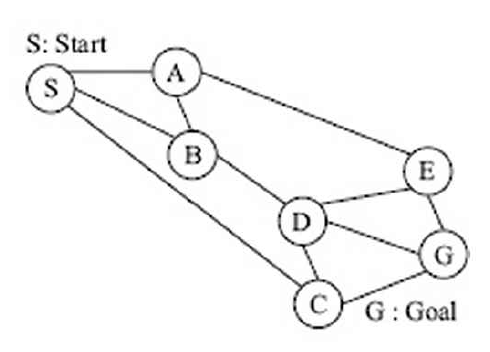

In [24]:
from IPython.display import Image, display
Image(filename="../../Graphs/Graph_1_ref.png", width=275, height=200)

#### Graph Representation

In [25]:

#~ An unweighed undirected graph represented as a hashmap/dictionary of Parent node and connected children
graph = { "S": ["A", "B", "C"],
          "A": ["B", "E", "S"],
          "B": ["A", "D", "S"],
          "C": ["D", "G", "S"],
          "D": ["B", "C", "E", "G"],
          "E": ["A", "D", "G"],
          "G": ["C", "D", "E"]
        }

<p style="font-size: 16px">Primary data structures (OPEN and CLOSED) will work on <i>Parent-child</i> pairs(tuples)</p>

In [26]:
def make_pair(to_, from_):
  return (to_, from_)

<p style="font-size: 16px"><b>MoveGen</b> -> Generates new nodes and moves the process of searching forward</p>

In [27]:
def dfs_move_gen(graph, curr):
  new_nodes = [make_pair(new, curr) for new in graph[curr][::-1]]     
  # new_nodes = [make_pair(new, curr) for new in graph[curr]]         # DFS highly depends on the "first direction" of traversal, it does not always guarantee an optimal path
  return new_nodes

<p style="font-size: 16px"><b>Remove seen</b> -> Avoids repeat traversals and infinite looping (Simple Search 3's improvement upon SS2)</p>

###### Remove_seen checks *both* the *CLOSED* and *OPEN* lists in DFS

In [28]:
def dfs_remove_seen(new_nodes, OPEN, CLOSED):
  cleansed = []
  OPEN_ = [n[0] for n in OPEN]        # only the children, not the whole pair 
  CLOSED_ = [n[0] for n in CLOSED]
  for node in new_nodes:
    if node[0] not in OPEN_ and node[0] not in CLOSED_:   # if and only if the new node is not already in OPEN and CLOSED, add it
      cleansed.append(node)
  return cleansed

<p style="font-size: 16px"><b>Reconstruct path</b> -> When Goal node is found, this functions returns the exact path taken to reach to it</p>

In [29]:
def reconstruct_path(OPEN, CLOSED):
  path = [OPEN.pop(0)]
  node = path[0]

  while node[1] != "NIL":
    for m in CLOSED:
      if node[1] == m[0]:
        path.append(m)
        node = m
  return path

<p style="font-size: 16px"><b>Print path</b> -> Utility function to print the final path prettily</p>

In [30]:
def print_path(path):
  for node_ix in range(len(path)):
    if node_ix != len(path) - 1:
      print(f"\033[38;5;214m{path[node_ix][0]}", end="\033[38;5;207m -> \033[0m")
    else:  
      print(f"\033[38;5;214m{path[node_ix][0]}")

<p style="font-size: 20px"><b>Core working function</b></p>

In [31]:
def graph_dfs(graph, start, goal):
  OPEN = [make_pair(start, "NIL")]
  CLOSED = []
  
  while len(OPEN) != 0:
    print("OPEN: ", OPEN)
    if OPEN[0][0] == goal:
      print("Path from Source to Goal:", end=" ")
      print_path(reconstruct_path(OPEN, CLOSED)[::-1])
      return
    else:
      CLOSED.append(OPEN.pop(0))
      new_nodes = dfs_move_gen(graph, CLOSED[-1][0])
      new_nodes = dfs_remove_seen(new_nodes, OPEN, CLOSED)
      [(OPEN.insert(0, i)) for i in new_nodes]        # Stack implementation of OPEN in DFS
  print("\033[38;5;197mGoal not found...\033[0m")

<p style="font-size: 20px">Function Calls</p>

<p style="font-size: 20px"><b>For the graph set above ↑</b></p>

<p style="font-size: 16px">Case 1: Simple <b>Start (S)</b> to <b>Goal (G)</b> searching</p>

In [32]:
graph_dfs(graph, "S", "G")

OPEN:  [('S', 'NIL')]
OPEN:  [('A', 'S'), ('B', 'S'), ('C', 'S')]
OPEN:  [('E', 'A'), ('B', 'S'), ('C', 'S')]
OPEN:  [('D', 'E'), ('G', 'E'), ('B', 'S'), ('C', 'S')]
OPEN:  [('G', 'E'), ('B', 'S'), ('C', 'S')]
Path from Source to Goal: S -> A -> E -> G


<p style="font-size: 16px">Case 2: Goal is not present</p>

In [33]:
graph_dfs(graph, "A", "H")

OPEN:  [('A', 'NIL')]
OPEN:  [('B', 'A'), ('E', 'A'), ('S', 'A')]
OPEN:  [('D', 'B'), ('E', 'A'), ('S', 'A')]
OPEN:  [('C', 'D'), ('G', 'D'), ('E', 'A'), ('S', 'A')]
OPEN:  [('G', 'D'), ('E', 'A'), ('S', 'A')]
OPEN:  [('E', 'A'), ('S', 'A')]
OPEN:  [('S', 'A')]
Goal not found...


<p style="font-size: 16px">Case 3: Begins with Goal itself</p>

In [34]:
graph_dfs(graph, "G", "G")

OPEN:  [('G', 'NIL')]
Path from Source to Goal: G


<p style="font-weight: 700; font-size: 20px">Graph 2 - Semi Directed</p>

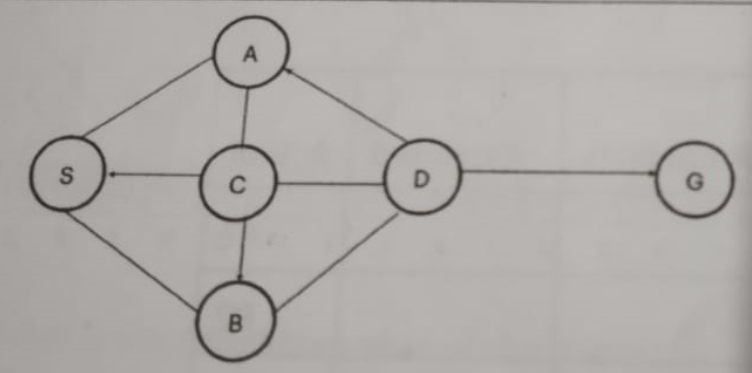

In [35]:
Image(filename="../../Graphs/Graph_2_ref.png", width=400, height=200)

In [36]:
graph = { "S": ["A", "B"],
          "A": ["C", "S"],
          "B": ["D", "S"],
          "C": ["A", "B", "D", "S"],
          "D": ["A", "B", "C", "G"],
          "G": []
        }

<p style="font-size: 16px">Case 1: Simple <b>Start (S)</b> to <b>Goal (G)</b> searching</p>

In [37]:
graph_dfs(graph, "S", "G")

OPEN:  [('S', 'NIL')]
OPEN:  [('A', 'S'), ('B', 'S')]
OPEN:  [('C', 'A'), ('B', 'S')]
OPEN:  [('D', 'C'), ('B', 'S')]
OPEN:  [('G', 'D'), ('B', 'S')]
Path from Source to Goal: S -> A -> C -> D -> G


<p style="font-weight: 700; font-size: 20px">NPTEL - CLOSED list anomaly</p>

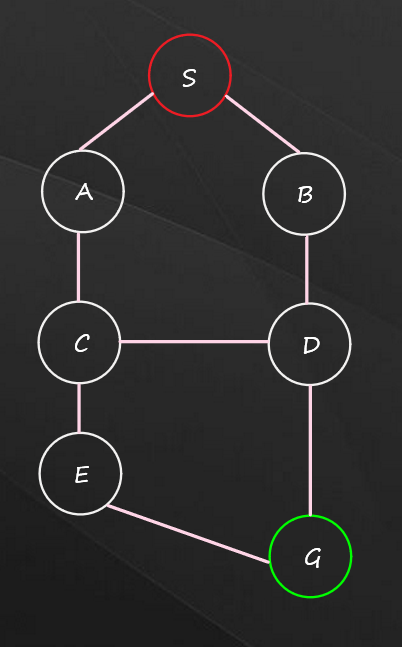

In [38]:
Image(filename="../../Graphs/Graph_3_ref.png")

In [39]:
graph = { "S": ["A", "B"],
          "A": ["C", "S"],
          "B": ["D", "S"],
          "C": ["A", "D", "E"],
          "D": ["B", "C", "G"],
          "E": ["C", "G"],
          "G": ["D", "E"]
        }

<p style="font-size: 16px">Case 1: Simple <b>Start (S)</b> to <b>Goal (G)</b> searching</p>

In [40]:
graph_dfs(graph, "S", "G")

OPEN:  [('S', 'NIL')]
OPEN:  [('A', 'S'), ('B', 'S')]
OPEN:  [('C', 'A'), ('B', 'S')]
OPEN:  [('D', 'C'), ('E', 'C'), ('B', 'S')]
OPEN:  [('G', 'D'), ('E', 'C'), ('B', 'S')]
Path from Source to Goal: S -> A -> C -> D -> G


<p style="font-weight: 700; font-size: 20px">Tree</p>

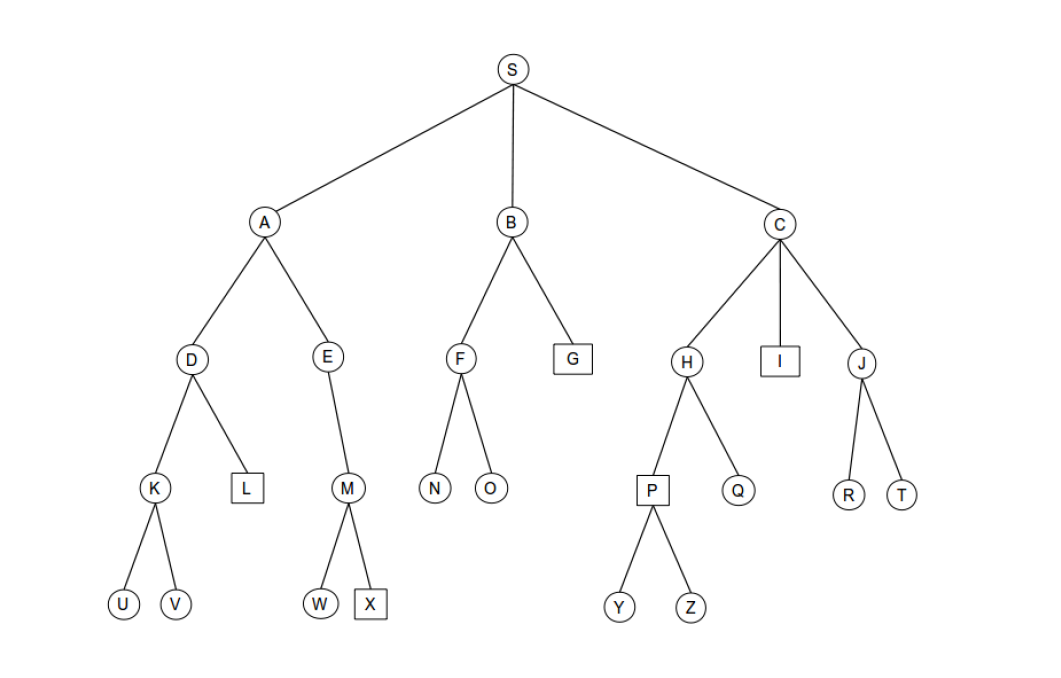

In [41]:
Image(filename="../../Graphs/Graph_4_ref.png", width=600, height=350)

In [42]:
graph = { "S": ["A", "B", "C"],
          "A": ["D", "E"],
          "B": ["F", "G"],
          "C": ["H", "I", "J"],
          "D": ["K", "L"],
          "E": ["M"],
          "F": ["N", "O"],
          "G": [],
          "H": ["P", "Q"],
          "I": [],
          "J": ["R", "T"],
          "K": ["U", "V"],
          "L": [],
          "M": ["W", "X"],
          "N": [],
          "O": [],
          "P": ["Y", "Z"],
          "Q": [],
          "R": [],
          "T": [],
          "U": [],
          "V": [],
          "W": [],
          "X": [],
          "Y": [],
          "Z": [],
        }

<p style="font-size: 16px">Case 1: Simple <b>Start (S)</b> to <b>Goal (G)</b> searching</p>

In [43]:
graph_dfs(graph, "S", "G")

OPEN:  [('S', 'NIL')]
OPEN:  [('A', 'S'), ('B', 'S'), ('C', 'S')]
OPEN:  [('D', 'A'), ('E', 'A'), ('B', 'S'), ('C', 'S')]
OPEN:  [('K', 'D'), ('L', 'D'), ('E', 'A'), ('B', 'S'), ('C', 'S')]
OPEN:  [('U', 'K'), ('V', 'K'), ('L', 'D'), ('E', 'A'), ('B', 'S'), ('C', 'S')]
OPEN:  [('V', 'K'), ('L', 'D'), ('E', 'A'), ('B', 'S'), ('C', 'S')]
OPEN:  [('L', 'D'), ('E', 'A'), ('B', 'S'), ('C', 'S')]
OPEN:  [('E', 'A'), ('B', 'S'), ('C', 'S')]
OPEN:  [('M', 'E'), ('B', 'S'), ('C', 'S')]
OPEN:  [('W', 'M'), ('X', 'M'), ('B', 'S'), ('C', 'S')]
OPEN:  [('X', 'M'), ('B', 'S'), ('C', 'S')]
OPEN:  [('B', 'S'), ('C', 'S')]
OPEN:  [('F', 'B'), ('G', 'B'), ('C', 'S')]
OPEN:  [('N', 'F'), ('O', 'F'), ('G', 'B'), ('C', 'S')]
OPEN:  [('O', 'F'), ('G', 'B'), ('C', 'S')]
OPEN:  [('G', 'B'), ('C', 'S')]
Path from Source to Goal: S -> B -> G


<p style="font-weight: 700; font-size: 20px">Beeg Graph</p>

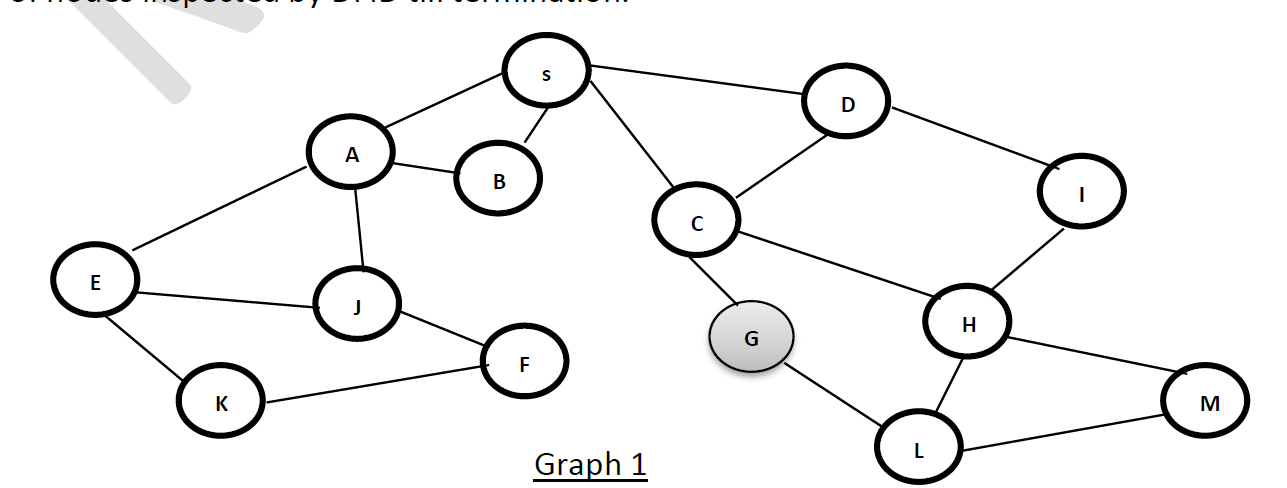

In [44]:
Image(filename="../../Graphs/Graph_5_ref.png", width=850, height=350)

In [45]:
graph = { "S": ["A", "B", "C", "D"],
          "A": ["B", "E", "J", "S"],
          "B": ["A", "S"],
          "C": ["D", "G", "H", "S"],
          "D": ["C", "I", "S"],
          "E": ["A", "J", "K"],
          "F": ["J", "K"],
          "G": ["C", "L"],
          "H": ["C", "I", "L", "M"],
          "I": ["D", "H"],
          "J": ["A", "E", "F"],
          "K": ["E", "F"],
          "L": ["G", "H", "M"],
          "M": ["H", "L"],
        }

<p style="font-size: 16px">Case 1: Simple <b>Start (S)</b> to <b>Goal (G)</b> searching</p>

In [46]:
graph_dfs(graph, "S", "G")

OPEN:  [('S', 'NIL')]
OPEN:  [('A', 'S'), ('B', 'S'), ('C', 'S'), ('D', 'S')]
OPEN:  [('E', 'A'), ('J', 'A'), ('B', 'S'), ('C', 'S'), ('D', 'S')]
OPEN:  [('K', 'E'), ('J', 'A'), ('B', 'S'), ('C', 'S'), ('D', 'S')]
OPEN:  [('F', 'K'), ('J', 'A'), ('B', 'S'), ('C', 'S'), ('D', 'S')]
OPEN:  [('J', 'A'), ('B', 'S'), ('C', 'S'), ('D', 'S')]
OPEN:  [('B', 'S'), ('C', 'S'), ('D', 'S')]
OPEN:  [('C', 'S'), ('D', 'S')]
OPEN:  [('G', 'C'), ('H', 'C'), ('D', 'S')]
Path from Source to Goal: S -> C -> G
